# Credit Card Customer Segementation Using K-means

## Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('customer_segmentation_credit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_Id               2000 non-null   object 
 1   age                       2000 non-null   float64
 2   gender                    2000 non-null   object 
 3   dependent_count           2000 non-null   int64  
 4   education_level           2000 non-null   object 
 5   marital_status            2000 non-null   object 
 6   estimated_income          2000 non-null   float64
 7   months_on_book            2000 non-null   float64
 8   total_relationship_count  2000 non-null   int64  
 9   months_inactive_12_mon    2000 non-null   int64  
 10  credit_limit              2000 non-null   float64
 11  total_trans_amount        2000 non-null   float64
 12  total_trans_count         2000 non-null   float64
 13  avg_utilization_ratio     2000 non-null   float64
dtypes: float

## value count analysis of categorical feature

In [3]:
df['gender'].value_counts()

gender
Male      1028
Female     972
Name: count, dtype: int64

In [4]:
df['marital_status'].value_counts()

marital_status
Single      716
Divorced    657
Married     627
Name: count, dtype: int64

In [5]:
df['education_level'].value_counts()

education_level
High School      556
Doctorate        502
Graduate         471
Post-Graduate    471
Name: count, dtype: int64

## Statistical analysis of numerical feature

In [6]:
df.describe()

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.451000,2.075500,52912.375155,68.123500,3.506000,3.04900,2818.493995,14700.578740,73.365000,0.617904
std,9.858154,1.404559,45584.085021,17.712089,1.715061,1.98836,2289.538206,3273.912212,17.218798,0.203154
min,18.000000,0.000000,20000.000000,12.000000,1.000000,0.00000,1000.000000,4980.440000,18.000000,0.057000
25%,39.000000,1.000000,20000.000000,56.000000,2.000000,1.00000,1000.000000,12290.350000,61.000000,0.485750
50%,45.000000,2.000000,33224.340000,68.000000,4.000000,3.00000,2022.320000,14803.570000,74.000000,0.665500
75%,52.000000,3.000000,70295.010000,80.000000,5.000000,5.00000,3606.952500,17052.065000,85.000000,0.800000
max,75.000000,4.000000,250000.000000,125.000000,6.000000,6.00000,13955.430000,23480.450000,121.000000,0.883000


## Visualization of dataframe

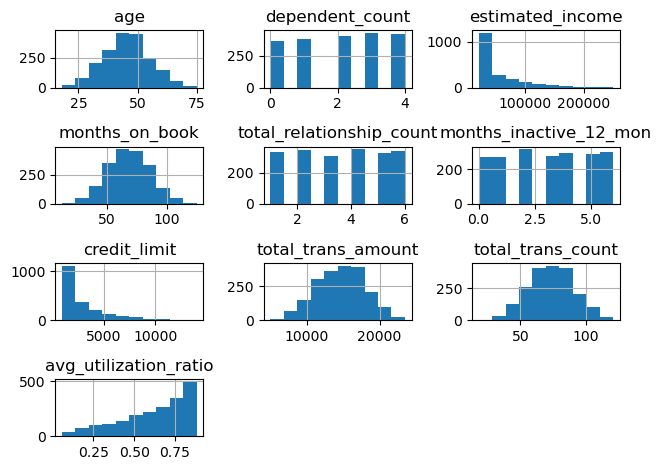

In [7]:
df.hist()
plt.tight_layout()

In [8]:
df.corr(numeric_only=True)

,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
age,1.000000,0.017699,-0.053130,0.822575,-0.025813,-0.002200,-0.044509,-0.006338,-0.011014,0.041761
dependent_count,0.017699,1.000000,0.011132,0.008171,-0.002369,0.038082,0.009911,0.009275,0.002997,-0.005478
estimated_income,-0.053130,0.011132,1.000000,-0.027049,0.023424,-0.014285,0.928238,-0.016673,-0.005511,-0.868741
months_on_book,0.822575,0.008171,-0.027049,1.000000,-0.007970,-0.004717,-0.017815,-0.025042,-0.025889,0.016364
total_relationship_count,-0.025813,-0.002369,0.023424,-0.007970,1.000000,0.012823,0.028453,-0.791497,-0.752144,-0.023328
months_inactive_12_mon,-0.002200,0.038082,-0.014285,-0.004717,0.012823,1.000000,-0.012444,-0.024403,-0.027656,0.016640
credit_limit,-0.044509,0.009911,0.928238,-0.017815,0.028453,-0.012444,1.000000,-0.020080,-0.005968,-0.958927
total_trans_amount,-0.006338,0.009275,-0.016673,-0.025042,-0.791497,-0.024403,-0.020080,1.000000,0.955140,0.009365
total_trans_count,-0.011014,0.002997,-0.005511,-0.025889,-0.752144,-0.027656,-0.005968,0.955140,1.000000,-0.001502
avg_utilization_ratio,0.041761,-0.005478,-0.868741,0.016364,-0.023328,0.016640,-0.958927,0.009365,-0.001502,1.000000


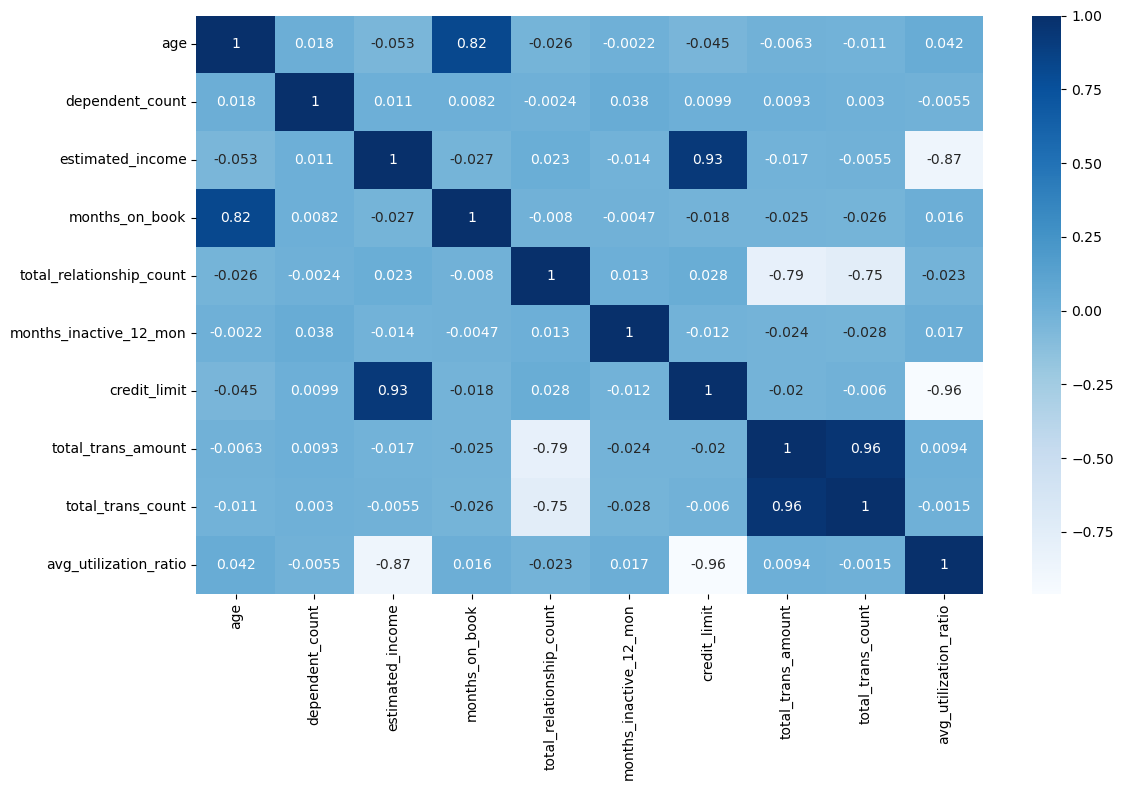

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True)
plt.tight_layout()

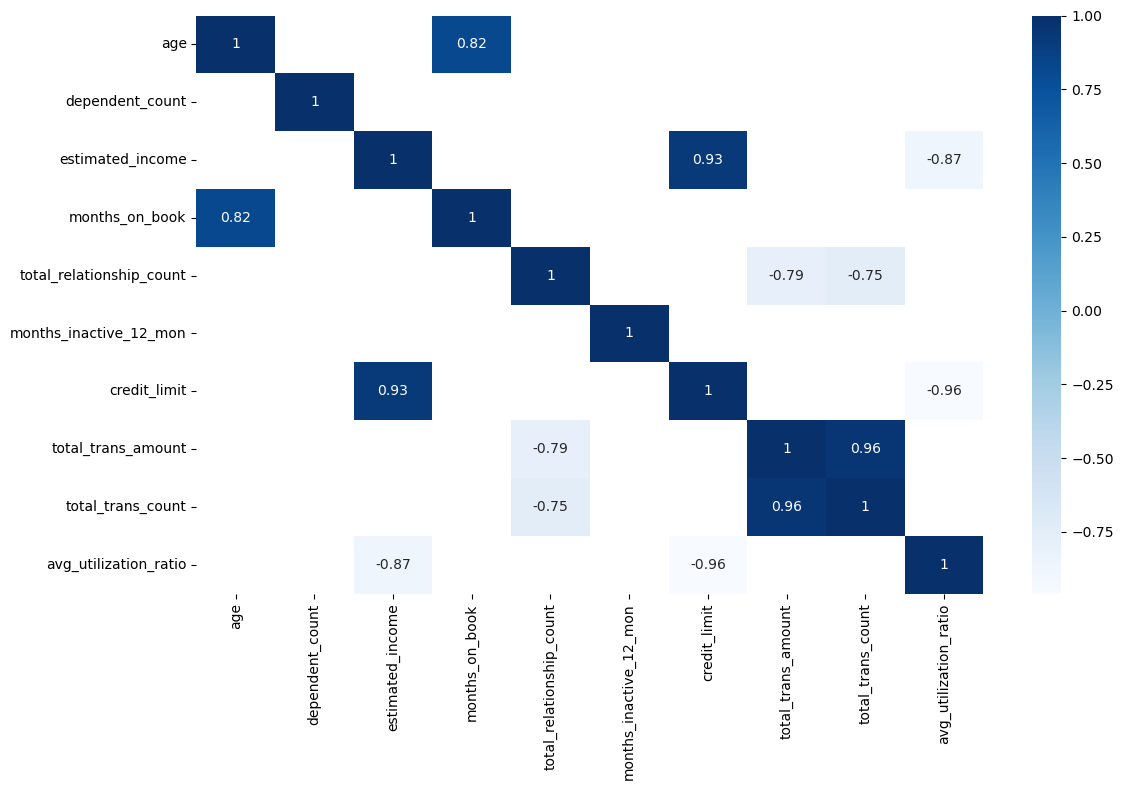

In [10]:
plt.figure(figsize=(12,8))
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations[(correlations>0.30) | (correlations < -0.30)], cmap='Blues', annot=True)
plt.tight_layout()

## Encoding the categorical features

In [11]:
df_copy = df.copy()

gender_map = {
    'Male': 1,
    'Female': 0
}

df_copy['gender'] = df['gender'].map(gender_map)
df_copy['gender'].value_counts()

gender
1    1028
0     972
Name: count, dtype: int64

In [12]:
df_copy['education_level'].value_counts()

education_mapping = {
    'High School': 1,
    'Graduate': 2,
    'Post-Graduate': 3,
    'Doctorate': 4
}

df_copy['education_level'] = df['education_level'].map(education_mapping)
df_copy['education_level'] = df_copy['education_level'].astype('int')
df_copy['education_level'].value_counts()

education_level
1    556
4    502
2    471
3    471
Name: count, dtype: int64

In [13]:
marital_status_dummies = pd.get_dummies(df_copy[['marital_status']], drop_first=True)
df_copy = pd.concat([df_copy, marital_status_dummies], axis=1)
df_copy.columns

Index(['customer_Id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio',
       'marital_status_Married', 'marital_status_Single'],
      dtype='object')

## Drop not required column

In [14]:
df_copy.drop(columns=['marital_status', 'customer_Id'], axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       2000 non-null   float64
 1   gender                    2000 non-null   int64  
 2   dependent_count           2000 non-null   int64  
 3   education_level           2000 non-null   int64  
 4   estimated_income          2000 non-null   float64
 5   months_on_book            2000 non-null   float64
 6   total_relationship_count  2000 non-null   int64  
 7   months_inactive_12_mon    2000 non-null   int64  
 8   credit_limit              2000 non-null   float64
 9   total_trans_amount        2000 non-null   float64
 10  total_trans_count         2000 non-null   float64
 11  avg_utilization_ratio     2000 non-null   float64
 12  marital_status_Married    2000 non-null   bool   
 13  marital_status_Single     2000 non-null   bool   
dtypes: bool(

## Scaling the dataset

In [15]:
X = df_copy

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[ 4.61560846e-01,  9.72381248e-01,  1.37052358e+00, ...,
         1.12797765e+00, -6.75769368e-01,  1.33914006e+00],
       [-1.47224618e-01,  9.72381248e-01,  6.58378306e-01, ...,
         6.45464598e-01, -6.75769368e-01, -7.46747882e-01],
       [ 5.63025090e-01, -1.02840321e+00,  6.58378306e-01, ...,
        -1.85080189e+00, -6.75769368e-01,  1.33914006e+00],
       ...,
       [-9.58938571e-01, -1.02840321e+00, -5.37669682e-02, ...,
         4.72665844e-04,  1.47979480e+00, -7.46747882e-01],
       [-2.48688862e-01,  9.72381248e-01,  6.58378306e-01, ...,
         1.21660249e+00,  1.47979480e+00, -7.46747882e-01],
       [-7.56010083e-01, -1.02840321e+00, -5.37669682e-02, ...,
         8.91644725e-01,  1.47979480e+00, -7.46747882e-01]])

## Elbow method 

In [16]:
from sklearn.cluster import KMeans

inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

### Plotting the elbow method

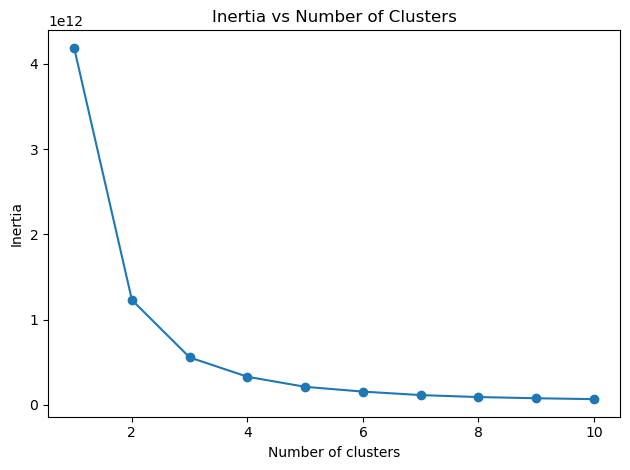

In [17]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.tight_layout()

## KMeans model with 4 cluster

In [18]:
model = KMeans(n_clusters=4, random_state=42)
y = model.fit_predict(X_scaled)

## Concatenating to the original dataframe

In [19]:
df['Cluster'] = y + 1
df

,customer_Id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Cluster
0,CUST1000,50.0,Male,4,Graduate,Single,33181.17,68.0,2,2,1000.00,16876.34,80.0,0.847,2
1,CUST1001,44.0,Male,3,Graduate,Divorced,20000.00,64.0,5,0,1193.38,14800.65,75.0,0.749,1
2,CUST1002,51.0,Female,3,Doctorate,Single,179608.31,69.0,6,4,7632.24,11224.37,53.0,0.242,3
3,CUST1003,60.0,Male,4,High School,Divorced,36491.64,87.0,2,6,1840.26,16915.15,80.0,0.718,2
4,CUST1004,43.0,Male,4,Doctorate,Married,47620.03,45.0,3,3,4281.27,14541.59,73.0,0.415,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,CUST2995,56.0,Female,3,Doctorate,Married,34414.56,84.0,5,5,1750.52,7625.22,33.0,0.683,4
1996,CUST2996,45.0,Male,0,High School,Divorced,20000.00,46.0,2,6,1000.00,17494.27,91.0,0.832,2
1997,CUST2997,36.0,Female,2,Doctorate,Married,20000.00,51.0,5,1,2483.74,12093.22,58.0,0.618,1
1998,CUST2998,43.0,Male,3,Post-Graduate,Married,22710.26,81.0,6,2,1000.00,8364.47,40.0,0.865,1


## Insight using plots

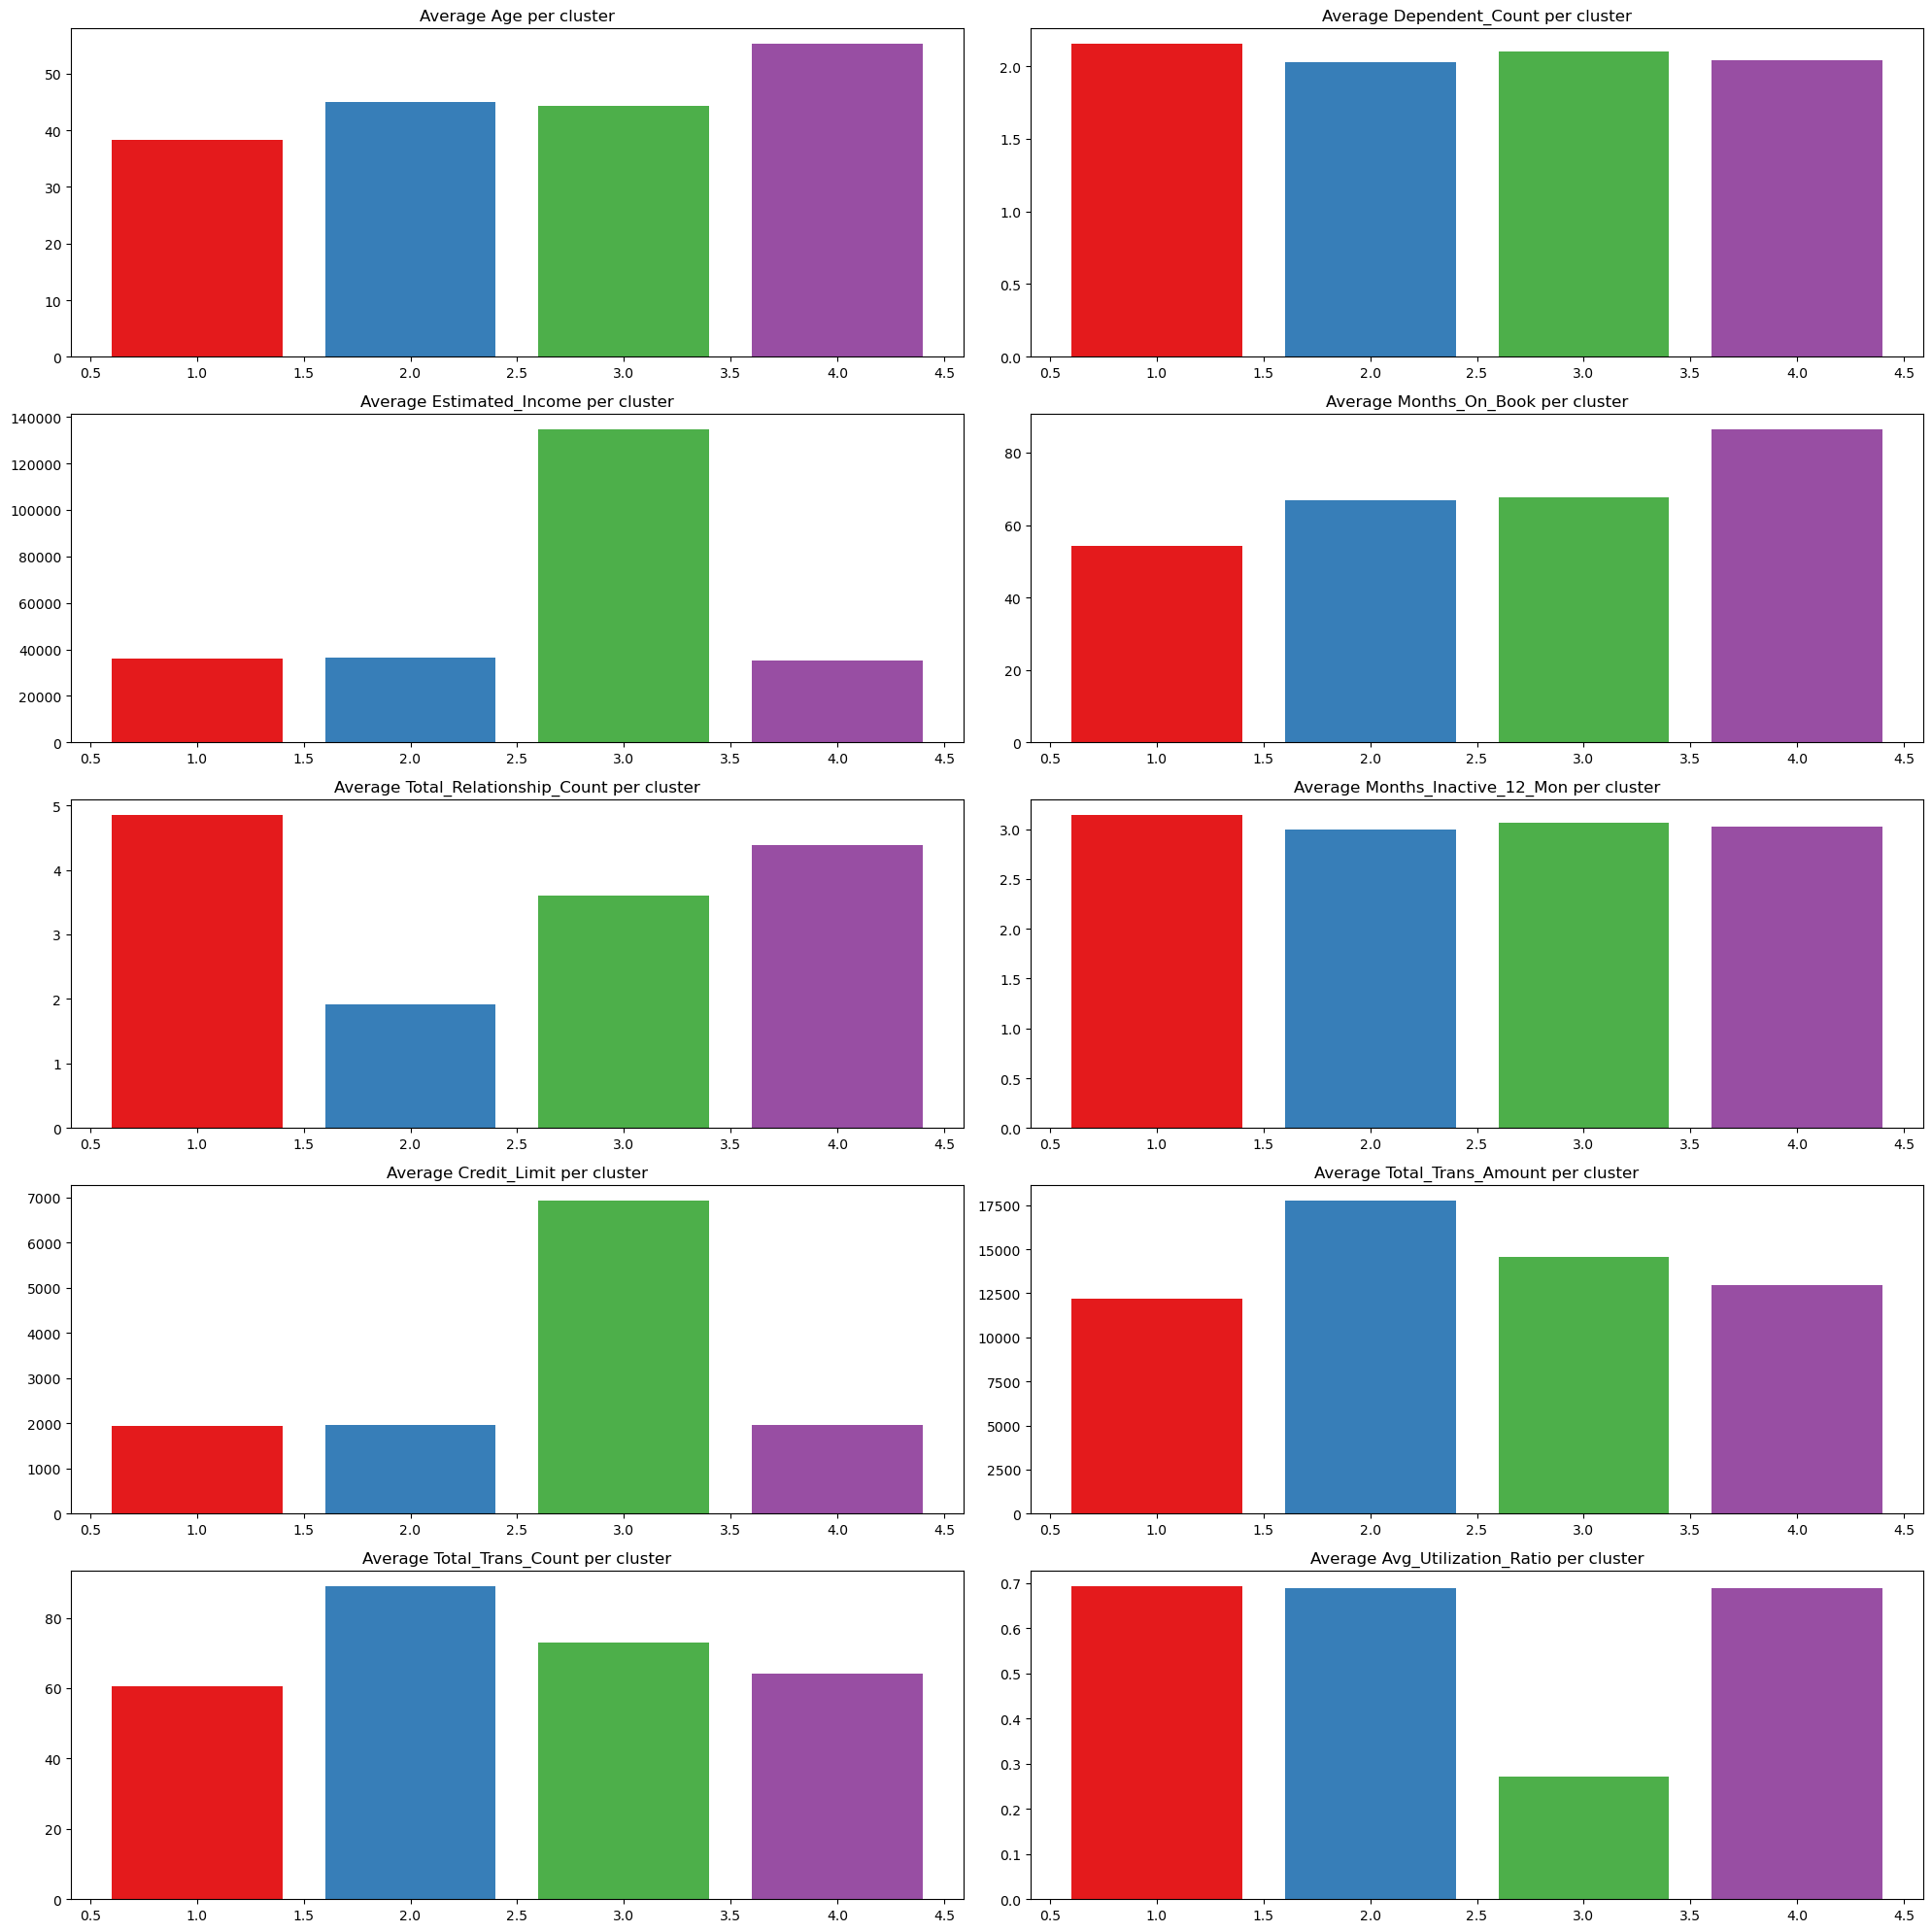

In [24]:
import numpy as np

numeric_columns = df.select_dtypes(include=np.number).drop(['Cluster'], axis=1).columns
numeric_columns

fig = plt.figure(figsize=(20,20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'))
    ax.set_title(f'Average {column.title()} per cluster')
  
plt.tight_layout()

In [26]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18,6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['Cluster'], columns=df[col], values=df[col], aggfunc='size')
    plot_df.plot.bar(stacked=True)

<Figure size 1800x600 with 0 Axes>